<a href="https://colab.research.google.com/github/Dipanwita-23/Data-Science_Projects/blob/main/Organizational_Behaviour/OB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Survey on Organizational Behaviour (Responses)_colab.xlsx")
data.head()

,NAME,GENDER,AGE,Work Experience (in Years ),I have a good understanding of my own emotions.,I really understand what I feel.,I am quite capable of controlling my own emotions.,I have good control of my emotions.,I am sensitive to the feelings and emotions of others.,I am a self-motivating person.,...,I am proud of the work that I do.,"At my job, I am very resilient, mentally.",Work Engagement,I am confident about my ability to do my job.,I have significant autonomy in determining how I do my job.,I can decide on my own how to go about doing my own work.,I have considerable opportunity for independence and freedom in how I do my job.,The work I do is meaningful to me.,Job Autonomy,Unnamed: 30
0,Mohit Mehta,Male,31-40,12.0,4,4,2,3,4,4,...,5,5,4.333333,4,4,4,2,4,3.6,NaN
1,HIRAK ROY,Male,Above 50,30.0,4,4,4,4,5,4,...,5,5,5.000000,5,4,5,4,5,4.6,NaN
2,Sneha Bhattacharyya,Female,25-30,1.0,5,5,4,4,5,5,...,5,5,5.000000,5,5,5,5,5,5.0,NaN
3,Pritam Basak,Male,18-24,3.0,5,5,5,4,5,5,...,4,4,4.333333,4,5,5,4,4,4.4,NaN
4,ABHIJIT MAITY,Male,25-30,3.0,3,4,4,4,4,4,...,5,4,4.166667,4,4,4,4,4,4.0,NaN


In [ ]:
# Descriptive statistics for Age
age_stats = data['AGE'].describe()

# Descriptive statistics for Gender (assuming it's categorical)
gender_counts = data['GENDER'].value_counts()

# Descriptive statistics for Work Experience
work_exp_stats = data['Work Experience (in Years )'].describe()

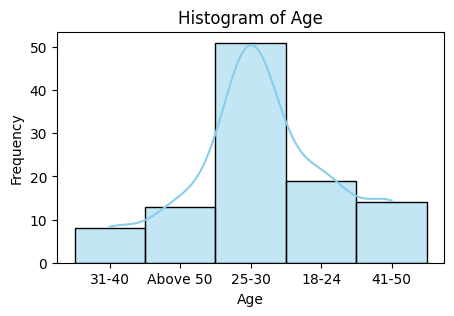

In [ ]:
# Plotting
# Histogram for Age
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
sns.histplot(data['AGE'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-cab9159d970d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='GENDER', palette='pastel')


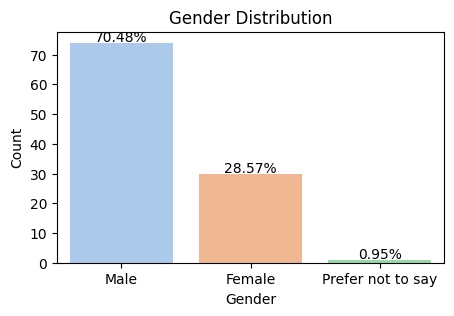

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Gender
plt.figure(figsize=(5, 3))

# Countplot
ax = sns.countplot(data=data, x='GENDER', palette='pastel')

# Calculate percentage distribution
total = len(data['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height/total:.2%}', ha="center", fontsize=10)

# Title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

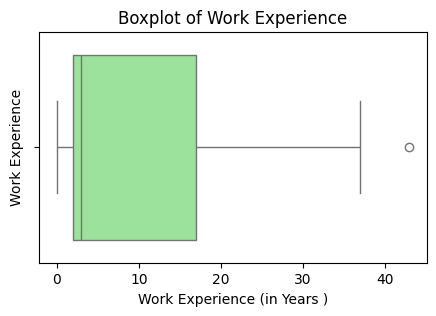

In [ ]:
# Box plot for Work Experience
plt.figure(figsize=(5, 3))
sns.boxplot(x=data['Work Experience (in Years )'], color='lightgreen')  # Interchanged x and y
plt.title('Boxplot of Work Experience')
plt.ylabel('Work Experience')  # Changed from xlabel to ylabel
plt.show()


In [ ]:
# Test Hypothesis H2: Emotional Intelligence is positively related to Work Engagement
correlation_ei_we = data['EI'].corr(data['Work Engagement'])

# Print correlation coefficient
print("Correlation between Emotional Intelligence and Work Engagement:", correlation_ei_we)


Correlation between Emotional Intelligence and Work Engagement: 0.5884746333881131


In [ ]:
# Test Hypothesis H2: Emotional intelligence is positively related to self-efficacy
# Compute correlation coefficient between Emotional Intelligence and Self-Efficacy
correlation_ei_se = data['EI'].corr(data['Self Efficacy'])

# Print correlation coefficient
print("Correlation between Emotional Intelligence and Self-Efficacy:", correlation_ei_se)

Correlation between Emotional Intelligence and Self-Efficacy: 0.39992342551397436


In [ ]:
# Test Hypothesis H3: Self-efficacy is positively related to work engagement
# Compute correlation coefficient between Self-Efficacy and Work Engagement
correlation_se_we = data['Self Efficacy'].corr(data['Work Engagement'])

# Print correlation coefficient
print("Correlation between Self-Efficacy and Work Engagement:", correlation_se_we)

Correlation between Self-Efficacy and Work Engagement: 0.48638693487483703


In [ ]:
# Test Hypothesis H4: Mediation Analysis
import statsmodels.api as sm

# Step 1: Fit the regression model predicting the mediator (Self-Efficacy) from the predictor (Emotional Intelligence)
X_mediator = data['EI']
X_mediator = sm.add_constant(X_mediator)  # Add constant term
y_mediator = data['Self Efficacy']
model_mediator = sm.OLS(y_mediator, X_mediator).fit()

# Step 2: Fit the regression model predicting the outcome (Work Engagement) from the predictor (Emotional Intelligence) and mediator (Self-Efficacy)
X_outcome = data[['EI', 'Self Efficacy']]
X_outcome = sm.add_constant(X_outcome)  # Add constant term
y_outcome = data['Work Engagement']
model_outcome = sm.OLS(y_outcome, X_outcome).fit()

# Step 3: Fit the mediation model (indirect effect) by regressing the outcome on the mediator (Self-Efficacy) and predictor (Emotional Intelligence)
X_mediation = data['Self Efficacy']
X_mediation = sm.add_constant(X_mediation)  # Add constant term
model_mediation = sm.OLS(y_outcome, X_mediation).fit()

# Step 4: Calculate the indirect effect
indirect_effect = model_mediator.params['EI'] * model_mediation.params['Self Efficacy']

# Print mediation results
print("Mediation Analysis Results:")
print("Indirect Effect:", indirect_effect)

Mediation Analysis Results:
Indirect Effect: 0.2246943067398886


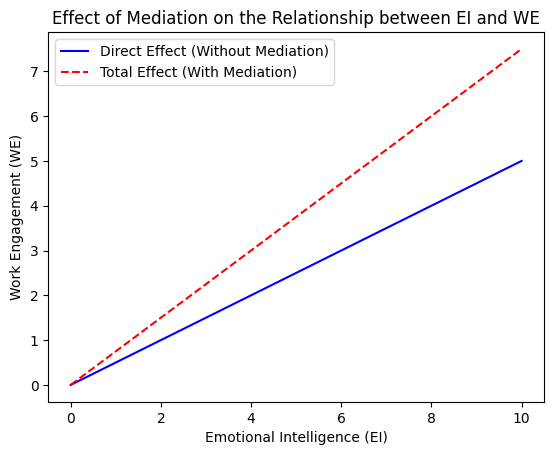

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points for EI and SE
EI = np.linspace(0, 10, 100)
SE = np.linspace(0, 10, 100)

# Calculate the direct effect of EI on WE
direct_effect = EI * 0.5

# Calculate the total effect of EI on WE through SE
total_effect = (EI * 0.5) + (SE * 0.25)

# Plot the direct effect
plt.plot(EI, direct_effect, label='Direct Effect (Without Mediation)', color='blue')

# Plot the total effect
plt.plot(EI, total_effect, label='Total Effect (With Mediation)', linestyle='--', color='red')

# Add labels and legend
plt.xlabel('Emotional Intelligence (EI)')
plt.ylabel('Work Engagement (WE)')
plt.title('Effect of Mediation on the Relationship between EI and WE')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Test Hypothesis H4: Job autonomy moderates the relationship between Emotional Intelligence and Work Engagement
# Conduct moderation analysis using regression analysis in statsmodels
import statsmodels.api as sm

# Include interaction term between Emotional Intelligence and Job Autonomy in regression model
data['Interaction_Term'] = data['EI'] * data['Job Autonomy']
model = sm.OLS(data['Work Engagement'], sm.add_constant(data[['EI', 'Job Autonomy', 'Interaction_Term']])).fit()

# Print regression results
print("Moderation Analysis Results:")
print(model.summary())

Moderation Analysis Results:
                            OLS Regression Results                            
Dep. Variable:        Work Engagement   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     39.72
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           4.88e-17
Time:                        12:15:44   Log-Likelihood:                -68.642
No. Observations:                 105   AIC:                             145.3
Df Residuals:                     101   BIC:                             155.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const      

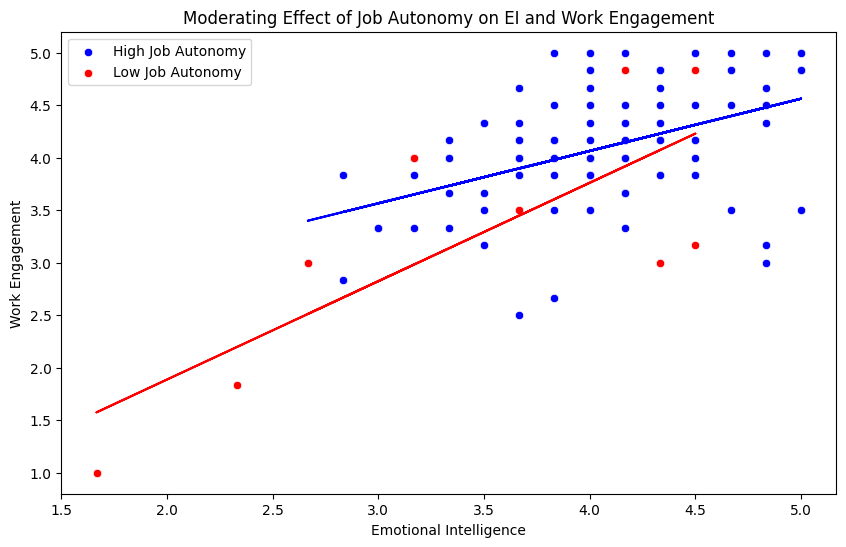

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Separate data for high and low job autonomy
high_autonomy_data = data[data['Job Autonomy'] >=3]
low_autonomy_data = data[data['Job Autonomy'] <= 3]

# Fit regression lines for each group
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='EI', y='Work Engagement', data=high_autonomy_data, color='blue', label='High Job Autonomy')
sns.scatterplot(x='EI', y='Work Engagement', data=low_autonomy_data, color='red', label='Low Job Autonomy')

# Fit regression line for high job autonomy
X_high = sm.add_constant(high_autonomy_data['EI'])
model_high = sm.OLS(high_autonomy_data['Work Engagement'], X_high).fit()
abline_high = model_high.params['EI'] * high_autonomy_data['EI'] + model_high.params['const']
ax.plot(high_autonomy_data['EI'], abline_high, color='blue')

# Fit regression line for low job autonomy
X_low = sm.add_constant(low_autonomy_data['EI'])
model_low = sm.OLS(low_autonomy_data['Work Engagement'], X_low).fit()
abline_low = model_low.params['EI'] * low_autonomy_data['EI'] + model_low.params['const']
ax.plot(low_autonomy_data['EI'], abline_low, color='red')

plt.title('Moderating Effect of Job Autonomy on EI and Work Engagement')
plt.xlabel('Emotional Intelligence')
plt.ylabel('Work Engagement')
plt.legend()
plt.show()